## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading the data

In [2]:
data=pd.read_csv('Walmart.csv')

## how data looks like

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## How big is data

In [4]:
data.shape

(6435, 8)

### Check dtype, column_name, non-null count

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
## Changing date to datetime
data['Date']=pd.to_datetime(data['Date'],format="%d-%m-%Y")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Check for Missing values

In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## strore column

<AxesSubplot:ylabel='count'>

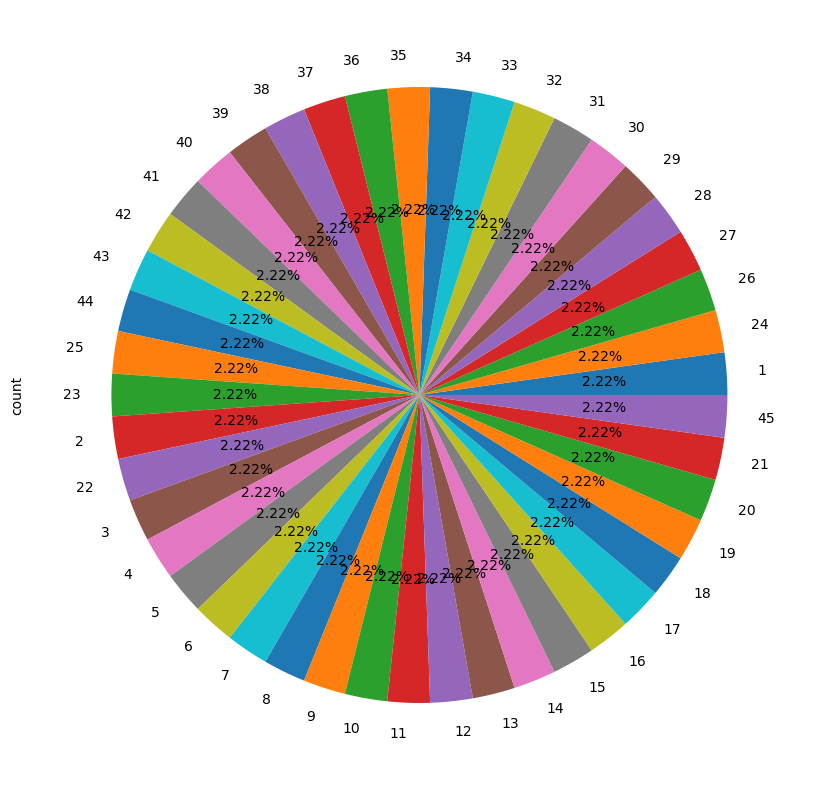

In [9]:
plt.figure(figsize=(20,10))
data.Store.value_counts().plot(kind='pie',autopct="%.2f%%")

## Creating the new feature year, month and day

In [10]:
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [11]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [12]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year'],
      dtype='object')

In [13]:
## correcting the order
data=data[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI',  'day','month','year',  'Unemployment']]
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,5,2,2010,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,12,2,2010,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,19,2,2010,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,26,2,2010,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,5,3,2010,8.106


## Dropping the date column

In [14]:
data.drop(['Date'],axis=1,inplace=True)

In [15]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,5,2,2010,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,12,2,2010,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,19,2,2010,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,26,2,2010,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,5,3,2010,8.106


## Train test split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Unemployment'],axis=1),data['Unemployment'],test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5148, 9)
(1287, 9)
(5148,)
(1287,)


In [18]:
cols=x_train.columns

In [19]:
cols

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'day', 'month', 'year'],
      dtype='object')

In [20]:
x_train

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,year
1033,8,836707.85,0,75.32,2.582,214.878556,17,9,2010
915,7,558963.83,0,20.70,3.372,192.058484,11,3,2011
5903,42,588592.61,0,61.24,3.130,126.546161,12,11,2010
2083,15,605413.17,0,69.19,3.906,136.213613,26,8,2011
5943,42,526641.23,0,87.40,3.743,129.240581,19,8,2011
...,...,...,...,...,...,...,...,...,...
3772,27,1709365.19,0,39.32,3.420,137.251185,18,2,2011
5191,37,508213.14,0,54.44,2.708,210.376263,3,12,2010
5226,37,510787.46,0,86.71,3.684,214.297294,5,8,2011
5390,38,342667.35,1,44.64,3.428,130.071032,30,12,2011


## Detecting outliers in each column

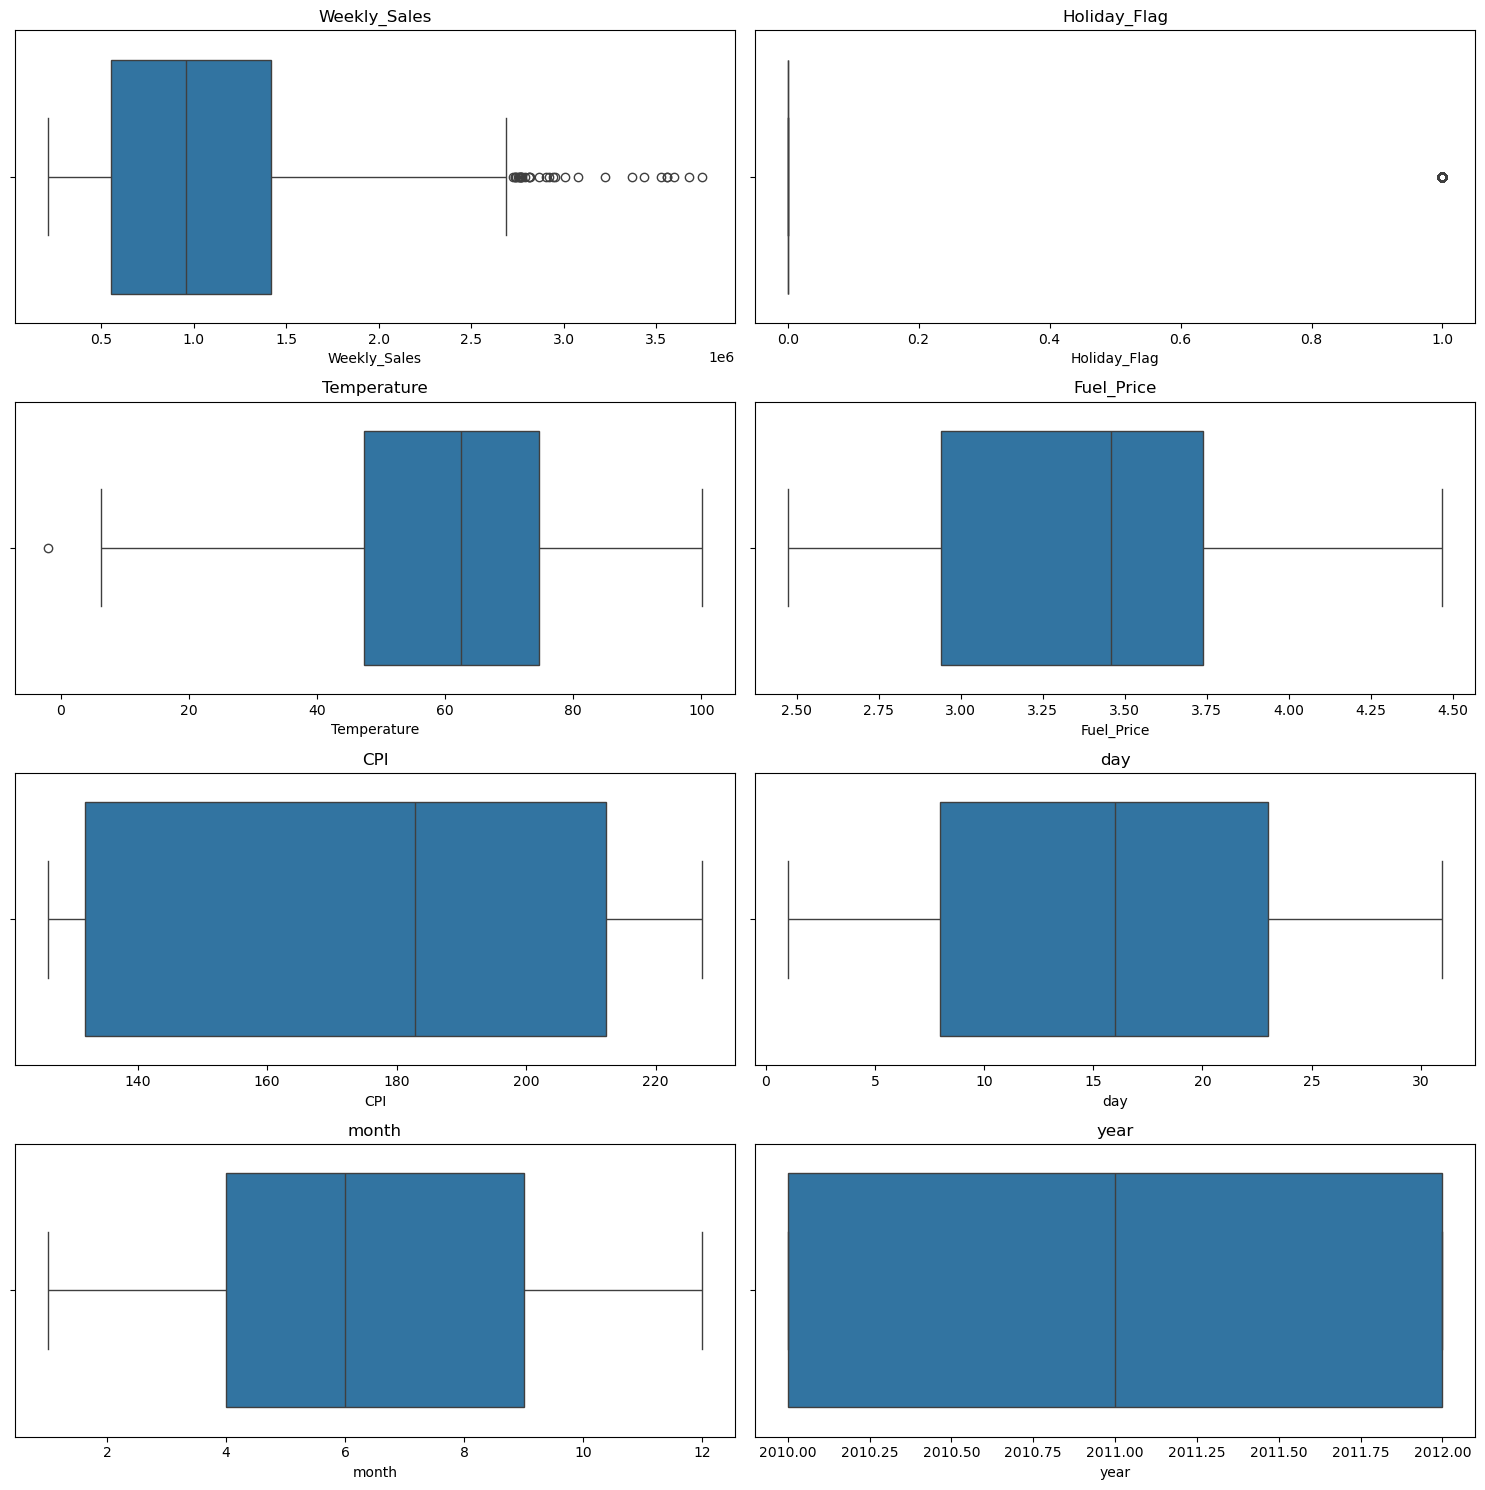

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
sns.boxplot(x=x_train['Weekly_Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Weekly_Sales')

sns.boxplot(x=x_train['Holiday_Flag'], ax=axes[0, 1])
axes[0, 1].set_title('Holiday_Flag')

sns.boxplot(x=x_train['Temperature'], ax=axes[1, 0])
axes[1, 0].set_title('Temperature')

sns.boxplot(x=x_train['Fuel_Price'], ax=axes[1, 1])
axes[1, 1].set_title('Fuel_Price')

sns.boxplot(x=x_train['CPI'], ax=axes[2, 0])
axes[2, 0].set_title('CPI')

sns.boxplot(x=x_train['day'], ax=axes[2, 1])
axes[2, 1].set_title('day')

sns.boxplot(x=x_train['month'], ax=axes[3, 0])
axes[3, 0].set_title('month')

sns.boxplot(x=x_train['year'], ax=axes[3, 1])
axes[3, 1].set_title('year')
plt.tight_layout()
plt.show()


## Capping Outliers from the Weekly Sales column

In [22]:
q1=x_train['Weekly_Sales'].quantile(0.25)
q3=x_train['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
x_train['Weekly_Sales']=np.where(x_train['Weekly_Sales']>upper_fence,
                                    upper_fence,
                                    np.where(x_train['Weekly_Sales']<lower_fence,
                                             lower_fence,
                                             x_train['Weekly_Sales']))

## After capping outliers

Text(0.5, 1.0, 'Weekly_Sales')

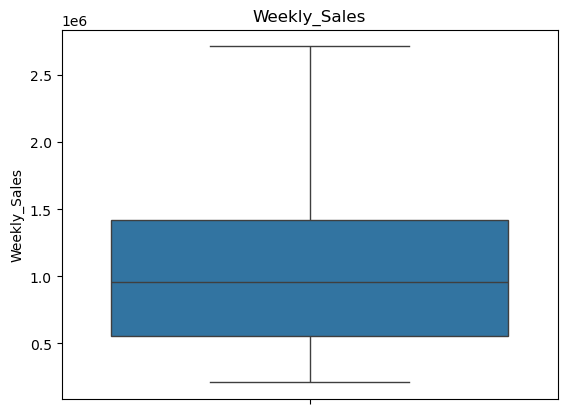

In [23]:
sns.boxplot(x_train['Weekly_Sales'])
plt.title('Weekly_Sales')

## Performing the Scaling if the data

## Distplot of each (univariate analysis)

C:\Users\suhaib mukhtar\AppData\Local\Temp\ipykernel_11352\874874054.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Weekly_Sales'], ax=axes[0, 0])
C:\Users\suhaib mukhtar\AppData\Local\Temp\ipykernel_11352\874874054.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Holid

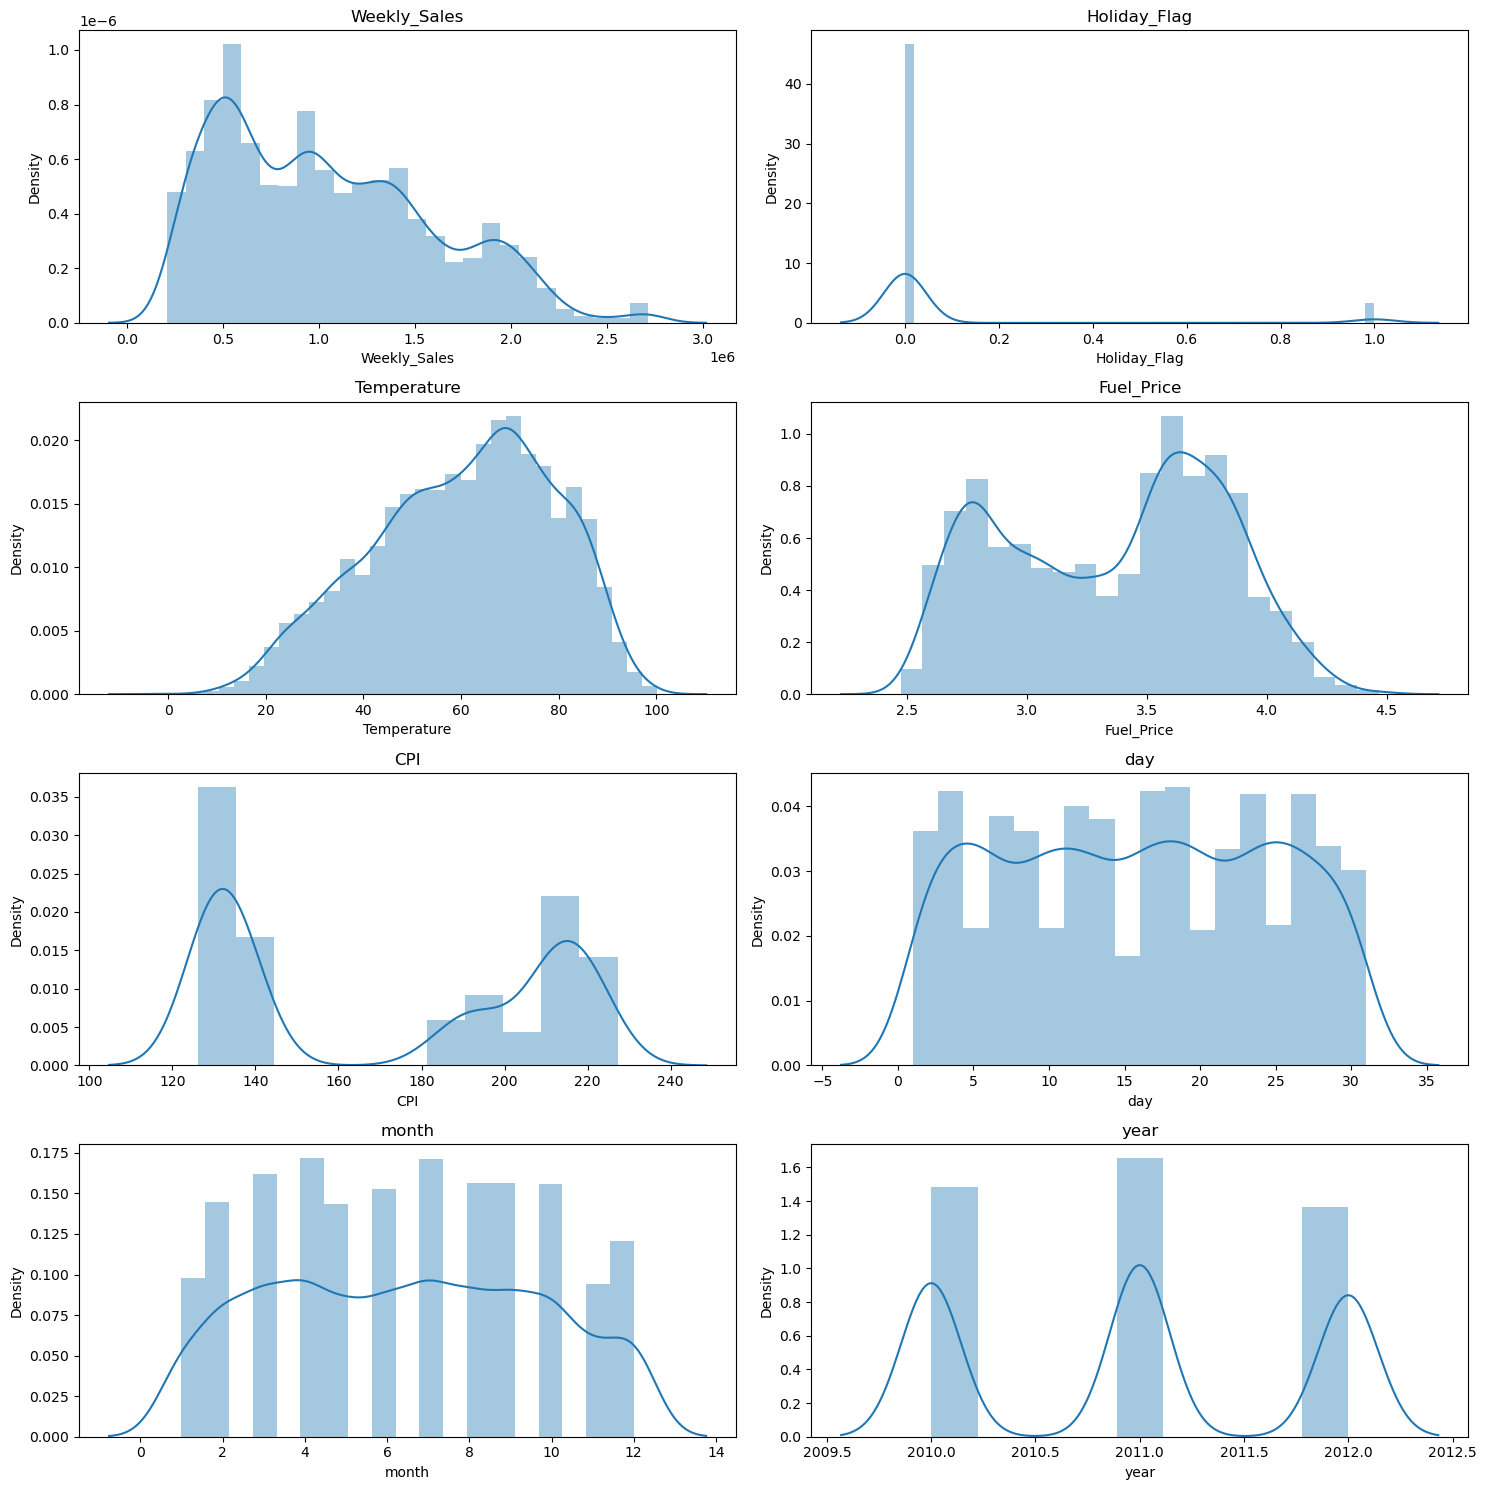

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
sns.distplot(x_train['Weekly_Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Weekly_Sales')

sns.distplot(x_train['Holiday_Flag'], ax=axes[0, 1])
axes[0, 1].set_title('Holiday_Flag')

sns.distplot(x_train['Temperature'], ax=axes[1, 0])
axes[1, 0].set_title('Temperature')

sns.distplot(x_train['Fuel_Price'], ax=axes[1, 1])
axes[1, 1].set_title('Fuel_Price')

sns.distplot(x_train['CPI'], ax=axes[2, 0])
axes[2, 0].set_title('CPI')

sns.distplot(x_train['day'], ax=axes[2, 1])
axes[2, 1].set_title('day')

sns.distplot(x_train['month'], ax=axes[3, 0])
axes[3, 0].set_title('month')

sns.distplot(x_train['year'], ax=axes[3, 1])
axes[3, 1].set_title('year')
plt.tight_layout()
plt.show()


## Multivarate Analysis

In [25]:
y_train

1033     6.315
915      8.818
5903     9.003
2083     7.806
5943     8.257
         ...  
3772     7.827
5191     8.476
5226     8.177
5390    12.890
860      9.014
Name: Unemployment, Length: 5148, dtype: float64

## cosstab

<AxesSubplot:xlabel='Unemployment', ylabel='Store'>

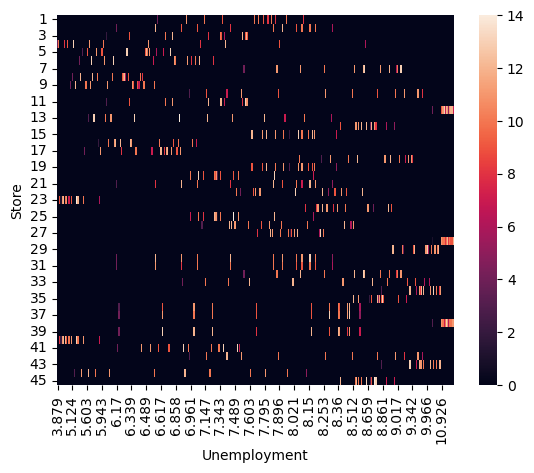

In [26]:
each_store=pd.crosstab(x_train['Store'],y_train)
sns.heatmap(each_store)

In [27]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x000001FCF0089DC0> (for post_execute):


KeyboardInterrupt: 

## Some Insights

####  Show sum of weekly_sales, and avg of temp, fuel_price, and cpi of each year

In [39]:
#Some Insights
grouped_data = x_train.groupby('year').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean'
}).reset_index()

print(grouped_data)

   year  Weekly_Sales  Temperature  Fuel_Price         CPI
0  2010  1.789517e+09    59.956895    2.823565  168.192856
1  2011  1.971918e+09    58.336667    3.563874  171.031448
2  2012  1.608450e+09    63.499898    3.706510  175.799898


#### Show sum of weekly_sales, and avg of temp, fuel_price, and cpi of each month

In [101]:
grouped_data = x_train.groupby('month').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean'
}).reset_index()

print(grouped_data)

    month  Weekly_Sales  Temperature  Fuel_Price         CPI
0       1  2.707517e+08    37.556254    3.249722  169.603654
1       2  4.521289e+08    38.753287    3.130403  169.233067
2       3  4.958949e+08    49.967101    3.420522  171.756396
3       4  5.175916e+08    57.595723    3.527750  172.152428
4       5  4.302680e+08    65.484426    3.582169  172.258767
5       6  4.844916e+08    75.224298    3.423989  172.808558
6       7  5.262845e+08    79.550509    3.313209  171.941379
7       8  4.922129e+08    78.889313    3.417163  171.358482
8       9  4.660423e+08    72.000494    3.448652  171.185592
9      10  4.598672e+08    61.330797    3.338037  172.121330
10     11  3.231907e+08    49.288464    3.180593  170.522647
11     12  4.511614e+08    39.835750    3.156144  172.465893


In [102]:
x_train.shape

(5148, 9)

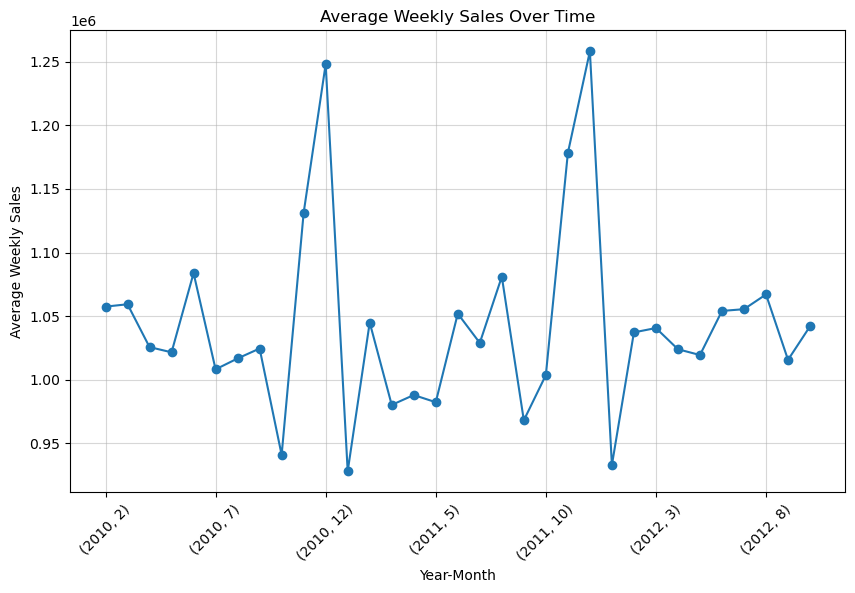

In [47]:
#Average weekly sales over time
monthly_sales = x_train.groupby(['year', 'month'])['Weekly_Sales'].mean()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True,alpha=0.5)

plt.show()

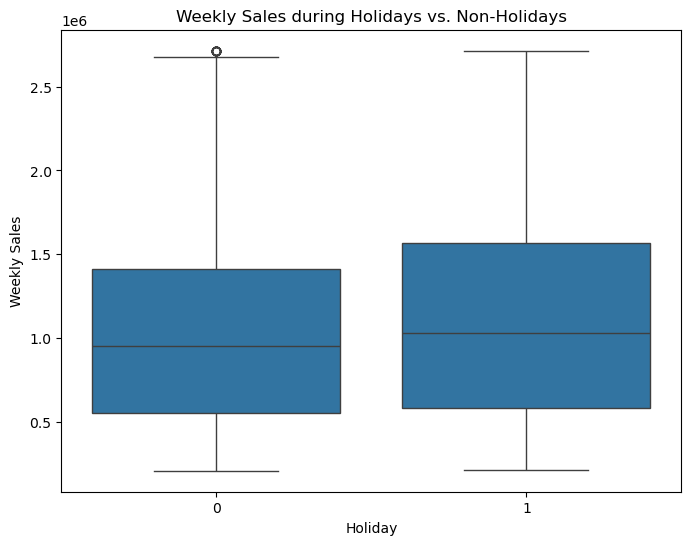

In [104]:
#box plot of weekly sales during holidays vs non-holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=x_train)
plt.title('Weekly Sales during Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.show()

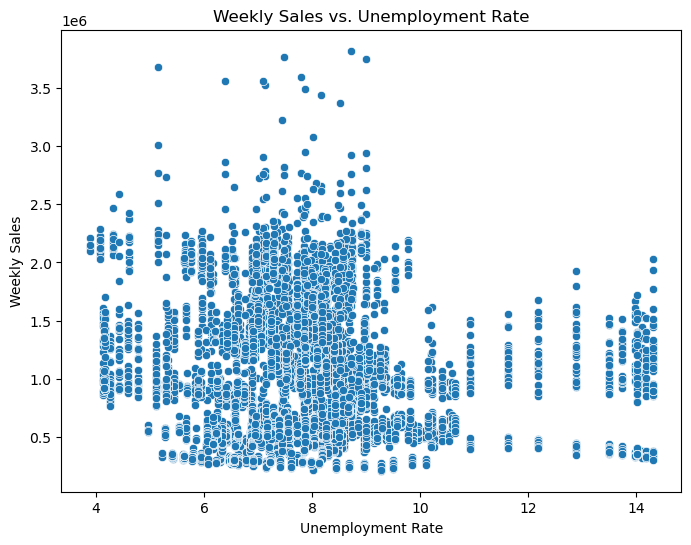

In [49]:
#scatter plot of weekly sales vs unemployment rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

## Defining the models to use for Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [51]:
lr=LinearRegression()
svr=SVR(kernel='rbf')
rf=RandomForestRegressor(random_state=42)
dt=DecisionTreeRegressor(max_features=0.75,random_state=42)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Modelling without using Feature selection

# Evaluating the model

#### Logistic Regression

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred=lr.predict(x_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred)
print('mae:', mae)
#mse
mse = mean_squared_error(y_test, y_pred)
print('mse:', mse)
#rmse
rmse = np.sqrt(mse)
print('rmse:', rmse)
# r2-score
r_squared = r2_score(y_test, y_pred)
print('r2_score:', r_squared)
#Not working well

mae: 1.1423268256106969
mse: 2.780290755365379
rmse: 1.667420389513508
r2_score: 0.21883304420974292


## SVM

In [56]:
svr.fit(x_train,y_train)

SVR()

In [57]:
yp=svr.predict(x_test)

In [58]:
mae = mean_absolute_error(y_test, yp)
print('mae:', mae)
#mse
mse = mean_squared_error(y_test, yp)
print('mse:', mse)
#rmse
rmse = np.sqrt(mse)
print('rmse:', rmse)
# r2-score
r_squared = r2_score(y_test, yp)
print('r2_score:', r_squared)
#Not working well

mae: 1.275160192868149
mse: 3.5553001130991886
rmse: 1.8855503475376065
r2_score: 0.0010818253771210928


## Random Forest

In [59]:
rf.fit(x_train,y_train)
ypp=rf.predict(x_test)

In [60]:
mae = mean_absolute_error(y_test, ypp)
print('mae:', mae)
#mse
mse = mean_squared_error(y_test, ypp)
print('mse:', mse)
#rmse
rmse = np.sqrt(mse)
print('rmse:', rmse)
# r2-score
r_squared = r2_score(y_test, ypp)
print('r2_score:', r_squared)
#Not working well

mae: 0.05670928515928608
mse: 0.04636653974584305
rmse: 0.2153289106131433
r2_score: 0.9869725824056742


## Decision Tree

In [61]:
dt.fit(x_train,y_train)
yyp=dt.predict(x_test)

In [62]:
mae = mean_absolute_error(y_test, yyp)
print('mae:', mae)
#mse
mse = mean_squared_error(y_test, yyp)
print('mse:', mse)
#rmse
rmse = np.sqrt(mse)
print('rmse:', rmse)
# r2-score
r_squared = r2_score(y_test, yyp)
print('r2_score:', r_squared)


mae: 0.048924630924631285
mse: 0.1084916487956488
rmse: 0.329380704953476
r2_score: 0.9695175438558673


# Among all the models Random Forest is working good

### Using Feature Selection

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [50]:
sfs=SFS(rf,
       k_features='best',
       forward=True,
       scoring='r2')

In [51]:
model=sfs.fit(x_train,y_train)

C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\suhaib 

In [55]:
best_feature_indices = sfs.k_feature_idx_
best_feature_indices

(0, 5, 7, 8)

In [56]:
sfs.get_metric_dict

<bound method SequentialFeatureSelector.get_metric_dict of SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(1, 9),
                          scoring='r2')>

In [57]:
model.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.8914791 , 0.8882934 , 0.8862292 , 0.88746749, 0.8811574 ]),
  'avg_score': 0.8869253171872181,
  'feature_names': ('Store',)},
 2: {'feature_idx': (0, 5),
  'cv_scores': array([0.99547468, 0.99429755, 0.99452818, 0.9931158 , 0.9910223 ]),
  'avg_score': 0.9936877030278926,
  'feature_names': ('Store', 'CPI')},
 3: {'feature_idx': (0, 5, 7),
  'cv_scores': array([0.99879404, 0.99872241, 0.99892809, 0.99841539, 0.99891398]),
  'avg_score': 0.9987547814573654,
  'feature_names': ('Store', 'CPI', 'month')},
 4: {'feature_idx': (0, 5, 7, 8),
  'cv_scores': array([0.99926255, 0.99910694, 0.99941701, 0.99868815, 0.99897715]),
  'avg_score': 0.9990903610922276,
  'feature_names': ('Store', 'CPI', 'month', 'year')},
 5: {'feature_idx': (0, 2, 5, 7, 8),
  'cv_scores': array([0.99921083, 0.99926722, 0.99927862, 0.99866902, 0.99896717]),
  'avg_score': 0.9990785729164916,
  'feature_names': ('Store', 'Holiday_Flag', 'CPI', 'month', 'year')},
 6: {'

## means only features at index 0 5 7 8 are best possible features, dropping rest features

In [65]:
x_train=x_train[['Store','CPI',"month","year"]]
x_test=x_test[['Store','CPI',"month","year"]]

### traing RandomForest  only using these 4 features

In [117]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [119]:
y_pred2=rf.predict(x_test)

In [72]:
x_train

,Store,CPI,month,year
2436,18,131.784000,3,2010
3361,24,135.265267,6,2011
233,2,217.325182,10,2011
3667,26,136.461806,11,2011
5011,36,209.980321,3,2010
...,...,...,...,...
2600,19,132.614193,8,2010
6308,45,182.046418,5,2010
6292,45,181.871190,2,2010
151,2,210.479887,4,2010


In [135]:
mae = mean_absolute_error(y_test, y_pred2)
print('mae:', mae)
#mse
mse = mean_squared_error(y_test, y_pred2)
print('mse:', mse)
#rmse
rmse = np.sqrt(mse)
print('rmse:', rmse)
# r2-score
r_squared = r2_score(y_test, y_pred2)
print('r2_score:', r_squared)


mae: 0.05238550116550183
mse: 0.03967001005299142
rmse: 0.19917331661894727
r2_score: 0.9888540790457033


## conclusdes only 4 features are required